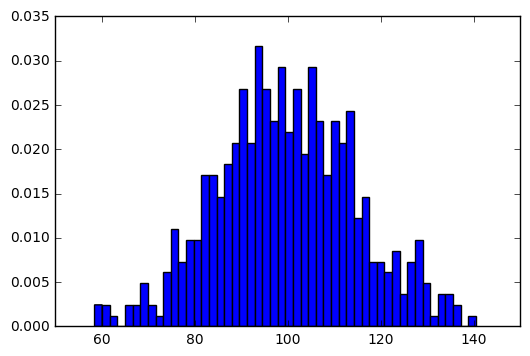

In [137]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


np.random.seed(0)

num_bins = 50

mu = 100
sigma = 15
x = mu + sigma * np.random.randn(500)
#np.random.rand(n) 产生标准正态分布， 即均值为0 标准差为1 的高斯分布 扥同于 np.random.normal(0, 1, n)
# x = mu + sigma * np.random.randn(500) 是产生500个均值为100， 方差为15 的随机数
# 等于 x = np.random.normal(100, 15, 500)
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, normed=1)
#这里ax.hist()即是画柱状图的函数
#x 为数据，num_bins为分隔的段数
plt.show()

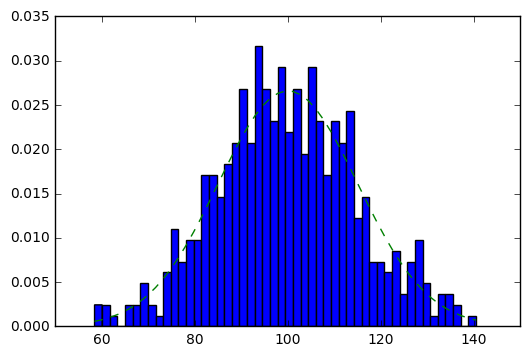

In [138]:
y = mlab.normpdf(bins, mu, sigma)
#这里用mlab.normpdf()方法来给柱状图拟合了一个正态分布曲线
ax.plot(bins, y, '--')
fig

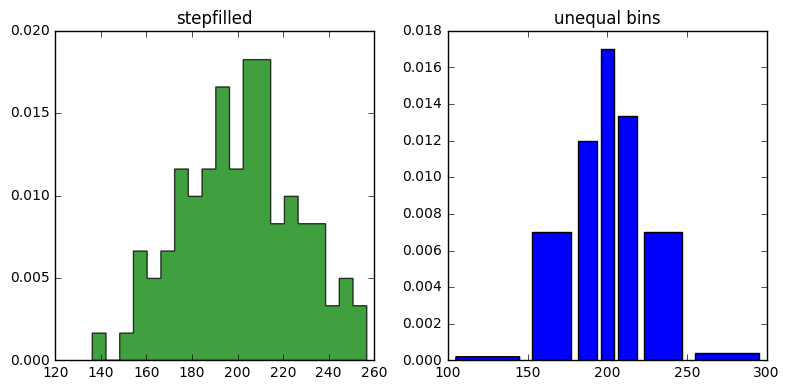

In [139]:
np.random.seed(0)

mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
#这里的ncols 参数即是字表的列数
ax0.hist(x, 20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')
#这里的ax0是的histtype 为setpfilled即每个数段的柱状图是连续的
#第二个参数20 是分的段数
# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
#这里的histtype是 bar类型即是每个bar独立分隔，便于观看
#其中bins 这个参数是一个List,即按list中给出的数来分段
ax1.set_title('unequal bins')

fig.tight_layout()
plt.show()

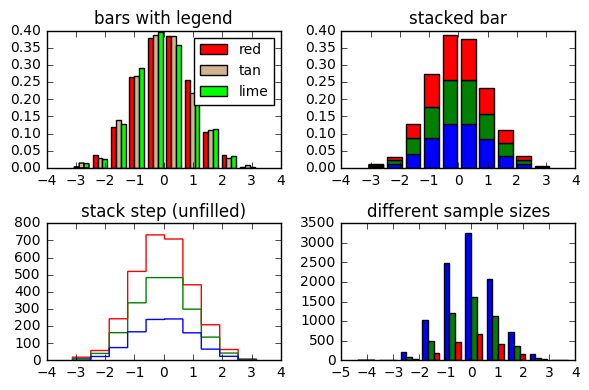

In [140]:
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)
#产生了一个1000*3的矩阵，每一列都是一千个正态分布的随机数
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')
#第一种类型是legend 主要可以用来横向对比不同组别数据的分布，在每一个区段占比的多少
ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')
#第二种类型是纵向对比，显示总体数据的分布，并且总体数据每个分段的柱状图上用颜色来区分不同组别数据的占比
ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')
#第三种类型是第二种的一个变形，请参考上面一个lab
# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')
#第四种类型换了一种原始数据，x_multi是一个list，里面x[0]是一个10000个数据的正态分布随机数,x[1],x[2]分别是5000,2000个正态分布的随机数
#第四种显示了每个分段不同数据的个数
fig.tight_layout()
plt.show()

In [141]:
df = pd.read_csv('pe_tatio.csv')
df = pd.DataFrame([df['code'], df['pe_ratio']]).T
df.head(5)
#首先读取数据，读到的df如下

,code,pe_ratio
0,300372.XSHE,-4.49
1,300656.XSHE,28.86
2,603269.XSHG,37.14
3,300653.XSHE,39.47
4,002873.XSHE,30.23


In [142]:
#接着对df进行处理，分为沪市，深市，创业板分别统计
def fun(x):
    if x[0][0] == '3':
        return 'gem'
    elif x[0][0] == '6':
        return 'sh'
    else :
        return 'sz'
    
df['type'] = df.apply(fun, axis=1)
df.head(5)

,code,pe_ratio,type
0,300372.XSHE,-4.49,gem
1,300656.XSHE,28.86,gem
2,603269.XSHG,37.14,sh
3,300653.XSHE,39.47,gem
4,002873.XSHE,30.23,sz


In [143]:
gem = df[df['type']=='gem']
sh = df[df['type']=='sh']
sz = df[df['type']=='sz']
gem.head(5)

,code,pe_ratio,type
0,300372.XSHE,-4.49,gem
1,300656.XSHE,28.86,gem
3,300653.XSHE,39.47,gem
5,300029.XSHE,-37.67,gem
6,300649.XSHE,82.49,gem


In [144]:
df.groupby('type').describe()
#使用describe方法可以大概查看一下分类后的信息的一些参数

code  pe_ratio
type                              
gem  count           639    639.00
     unique          639    623.00
     top     300331.XSHE     66.10
     freq              1      2.00
sh   count          1273   1273.00
     unique         1273   1218.00
     top     601991.XSHG     44.19
     freq              1      3.00
sz   count          1323   1323.00
     unique         1323   1256.00
     top     002007.XSHE     26.13
     freq              1      3.00

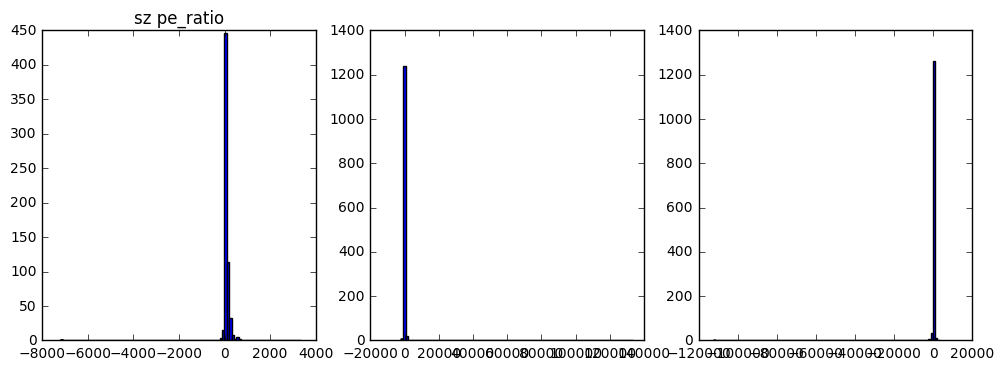

In [145]:
#下面开始用今天能学到的新东西绘制柱状图啦
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4))
gem_pe = gem['pe_ratio'].values
sh_pe = sh['pe_ratio'].values
sz_pe = sz['pe_ratio'].values

n_bins = 100

ax0.hist(gem_pe, n_bins)
ax0.set_title('gem pe_ratio')

ax1.hist(sh_pe, n_bins)
ax0.set_title('sh pe_ratio')

ax2.hist(sz_pe, n_bins)
ax0.set_title('sz pe_ratio')
plt.show()

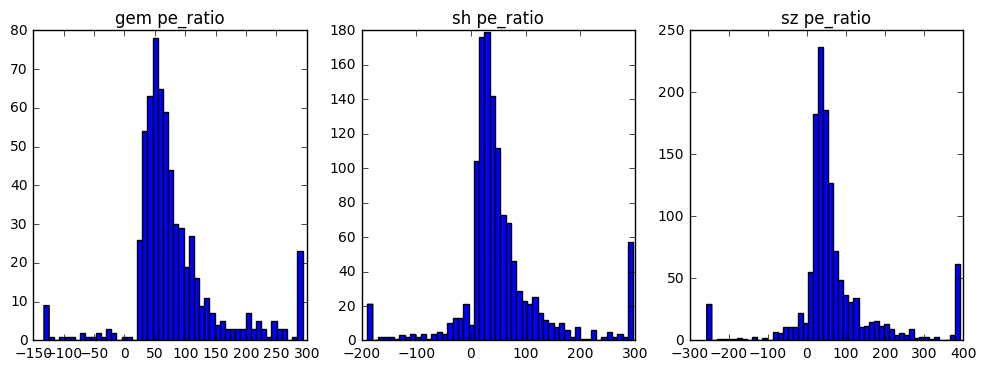

In [155]:
def altertremum(array):
    sigma = array.std()
    mu = array.mean()
    array[array > mu + 3*sigma] = mu + 3*sigma
    array[array < mu - 3*sigma] = mu - 3*sigma
    return array

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4))
gem_pe = gem['pe_ratio'].values
sh_pe = sh['pe_ratio'].values
sz_pe = sz['pe_ratio'].values

n_bins = 50

gem_pe = altertremum(gem_pe)
sh_pe = altertremum(sh_pe)
sz_pe = altertremum(sz_pe)

ax0.hist(gem_pe, n_bins)
ax0.set_title('gem pe_ratio')

ax1.hist(sh_pe, n_bins)
ax1.set_title('sh pe_ratio')

ax2.hist(sz_pe, n_bins)
ax2.set_title('sz pe_ratio')
plt.show()


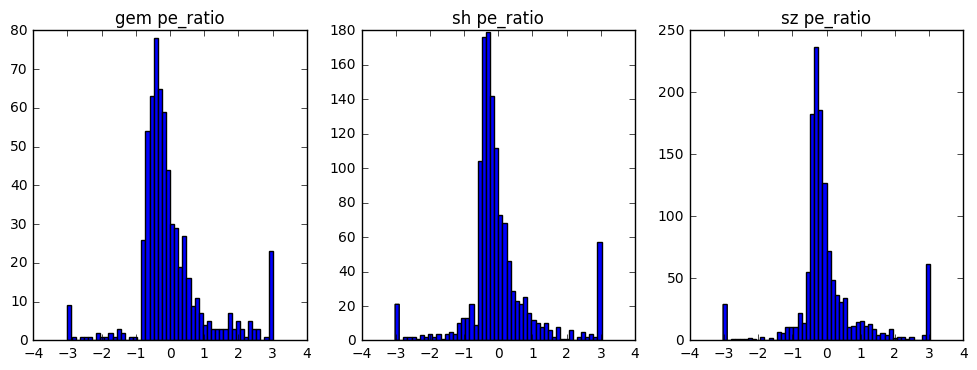

In [156]:
'''
1.求出各变量（指标）的算术平均值（数学期望）xi和标准差si ；
2.进行标准化处理：
zij=（xij－xi）/si
其中：zij为标准化后的变量值；xij为实际变量值。
3.将逆指标前的正负号对调。
'''
def neutralize(array):
    mu = array.mean()
    std = array.std()
    array = (array - mu)/std
    return array


fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4))
gem_pe = gem['pe_ratio'].values
sh_pe = sh['pe_ratio'].values
sz_pe = sz['pe_ratio'].values

n_bins = 50

gem_pe = neutralize(gem_pe)
sh_pe = neutralize(sh_pe)
sz_pe = neutralize(sz_pe)

ax0.hist(gem_pe, n_bins)
ax0.set_title('gem pe_ratio')

ax1.hist(sh_pe, n_bins)
ax1.set_title('sh pe_ratio')

ax2.hist(sz_pe, n_bins)
ax2.set_title('sz pe_ratio')
plt.show()